In [3]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [5]:
!ls

'programmers (1).ipynb'   test_answer_sample_.csv   test.zip   train.zip


In [6]:
!unzip train.zip

Archive:  train.zip
   creating: train/
   creating: train/dog/
  inflating: train/dog/pic_001.jpg   
  inflating: train/dog/pic_002.jpg   
  inflating: train/dog/pic_003.jpg   
  inflating: train/dog/pic_004.jpg   
  inflating: train/dog/pic_005.jpg   
  inflating: train/dog/pic_006.jpg   
  inflating: train/dog/pic_007.jpg   
  inflating: train/dog/pic_008.jpg   
  inflating: train/dog/pic_009.jpg   
  inflating: train/dog/pic_010.jpg   
  inflating: train/dog/pic_011.jpg   
  inflating: train/dog/pic_012.jpg   
  inflating: train/dog/pic_013.jpg   
  inflating: train/dog/pic_014.jpg   
  inflating: train/dog/pic_015.jpg   
  inflating: train/dog/pic_016.jpg   
  inflating: train/dog/pic_017.jpg   
  inflating: train/dog/pic_018.jpg   
  inflating: train/dog/pic_019.jpg   
  inflating: train/dog/pic_020.jpg   
  inflating: train/dog/pic_021.jpg   
  inflating: train/dog/pic_022.jpg   
  inflating: train/dog/pic_023.jpg   
  inflating: train/dog/pic_024.jpg   
  inflating: train/dog/p

In [7]:
!unzip test.zip

Archive:  test.zip
   creating: test/
   creating: test/0/
  inflating: test/0/0001.jpg         
  inflating: test/0/0002.jpg         
  inflating: test/0/0003.jpg         
  inflating: test/0/0004.jpg         
  inflating: test/0/0005.jpg         
  inflating: test/0/0006.jpg         
  inflating: test/0/0007.jpg         
  inflating: test/0/0008.jpg         
  inflating: test/0/0009.jpg         
  inflating: test/0/0010.jpg         
  inflating: test/0/0011.jpg         
  inflating: test/0/0012.jpg         
  inflating: test/0/0013.jpg         
  inflating: test/0/0014.jpg         
  inflating: test/0/0015.jpg         
  inflating: test/0/0016.jpg         
  inflating: test/0/0017.jpg         
  inflating: test/0/0018.jpg         
  inflating: test/0/0019.jpg         
  inflating: test/0/0020.jpg         
  inflating: test/0/0021.jpg         
  inflating: test/0/0022.jpg         
  inflating: test/0/0023.jpg         
  inflating: test/0/0024.jpg         
  inflating: test/0/0025.jpg 

In [8]:
!ls

'programmers (1).ipynb'   test_answer_sample_.csv   train
 test			  test.zip		    train.zip


In [9]:
train_path = '/content/drive/My Drive/Colab Notebooks/train'
test_path = '/content/drive/My Drive/Colab Notebooks/test'

In [66]:
batch = 64
img_height = 227
img_weidth = 227

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   width_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2)

train_gen = train_datagen.flow_from_directory(train_path,
                                       class_mode='categorical', 
                                       batch_size=batch, 
                                       target_size=(img_height, img_weidth),
                                       subset='training',
                                       seed=123)

val_gen = val_datagen.flow_from_directory(train_path,
                                     class_mode='categorical', 
                                     batch_size=batch, 
                                     target_size=(img_height, img_weidth),
                                     subset='validation',
                                     seed=123)

Found 1361 images belonging to 7 classes.
Found 337 images belonging to 7 classes.


(64, 227, 227, 3) (64, 7)


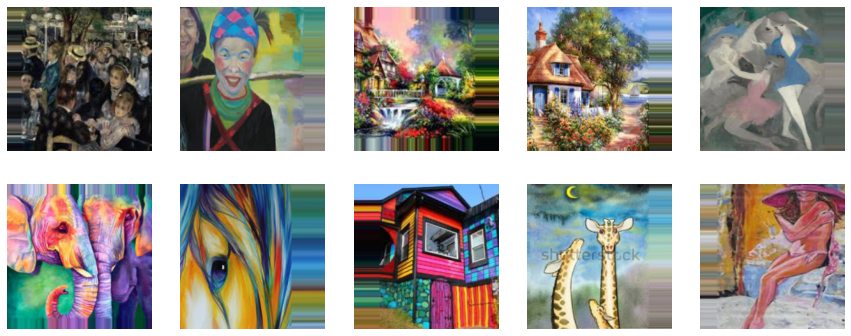

In [73]:
import matplotlib.pyplot as plt
for x, y in train_gen:
    print(x.shape, y.shape)
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].axis('off')
    
    plt.show()
    break

In [74]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.7/dist-packages (1.1.1)


In [75]:
import efficientnet.keras as efn

efficientNet = efn.EfficientNetB0(include_top=False, weights='imagenet', input_shape=(img_height, img_weidth, 3))

x = efficientNet.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(7, activation='softmax')(x)
# opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model = tf.keras.Model(efficientNet.input, x)

for layer in model.layers[:-15]:
  layer.trainable = False
for layer in model.layers[-15:]:
  layer.trainable = True


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 114, 114, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 114, 114, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 114, 114, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [89]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime
import os

# os.makedirs('models', exist_ok=True)
start_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

cp_earlystop = EarlyStopping(monitor='val_loss',
                             mode='min',
                             patience=10,
                             verbose=1)

cp_callback = ModelCheckpoint('models/%s-{epoch:02d}-{val_loss:.2f}.h5' % (start_time),
                              monitor='val_loss',
                              save_best_only=True,
                              mode='min', 
                              verbose=1)

In [90]:
history = model.fit(train_gen,
                    epochs = 40,
                    validation_data = val_gen,
                    callbacks=[cp_callback, cp_earlystop])

Epoch 1/40
22/22 [==============================] - 16s 738ms/step - loss: 0.1421 - accuracy: 0.9655 - val_loss: 0.6594 - val_accuracy: 0.9169

Epoch 00001: val_loss improved from inf to 0.65943, saving model to models/2021-05-23_04-32-02-01-0.66.h5
Epoch 2/40
22/22 [==============================] - 19s 856ms/step - loss: 0.1803 - accuracy: 0.9625 - val_loss: 0.4428 - val_accuracy: 0.9199

Epoch 00002: val_loss improved from 0.65943 to 0.44283, saving model to models/2021-05-23_04-32-02-02-0.44.h5
Epoch 3/40
22/22 [==============================] - 19s 855ms/step - loss: 0.1111 - accuracy: 0.9743 - val_loss: 0.4282 - val_accuracy: 0.9199

Epoch 00003: val_loss improved from 0.44283 to 0.42818, saving model to models/2021-05-23_04-32-02-03-0.43.h5
Epoch 4/40
22/22 [==============================] - 20s 899ms/step - loss: 0.0748 - accuracy: 0.9787 - val_loss: 0.3763 - val_accuracy: 0.9496

Epoch 00004: val_loss improved from 0.42818 to 0.37630, saving model to models/2021-05-23_04-32-02

In [96]:
!ls

 hansub.csv  'programmers (1).ipynb'   test_answer_sample_.csv	 train
 models       test		       test.zip			 train.zip


In [97]:
from tensorflow.keras.models import load_model
best_model = load_model('models/2021-05-23_04-32-02-05-0.37.h5')

Text(0.5, 1.0, 'training and validation loss')

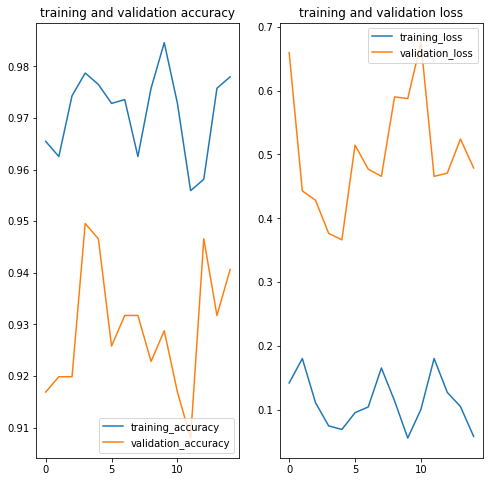

In [95]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'training_accuracy')
plt.plot(epochs_range, val_acc, label = 'validation_accuracy')
plt.legend(loc = 'lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'training_loss')
plt.plot(epochs_range, val_loss, label = 'validation_loss')
plt.legend(loc = 'upper right')
plt.title('training and validation loss')

In [98]:
test_datagen = ImageDataGenerator(rescale=1./255)

sub_gen = test_datagen.flow_from_directory(test_path,
                                           class_mode=None, 
                                           batch_size=batch,
                                           shuffle=False, 
                                           target_size=(img_height, img_weidth))

preds = best_model.predict_generator(sub_gen)

Found 350 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [102]:
import pandas as pd
import numpy as np
result=np.argmax(preds, axis=-1)
result

array([6, 3, 0, 0, 3, 3, 4, 0, 3, 1, 6, 2, 2, 2, 3, 1, 2, 0, 6, 3, 3, 5,
       1, 2, 0, 5, 1, 2, 0, 5, 1, 5, 6, 2, 0, 5, 5, 4, 5, 1, 2, 0, 2, 3,
       1, 3, 0, 5, 5, 5, 6, 5, 4, 1, 5, 6, 4, 3, 1, 1, 2, 0, 6, 1, 1, 1,
       4, 1, 1, 3, 1, 3, 0, 1, 1, 6, 2, 0, 3, 4, 1, 6, 0, 6, 6, 4, 3, 6,
       1, 2, 2, 5, 1, 0, 5, 6, 3, 3, 1, 6, 5, 6, 6, 0, 3, 2, 5, 3, 0, 3,
       4, 6, 2, 5, 4, 2, 0, 1, 5, 6, 4, 2, 5, 6, 1, 1, 5, 6, 0, 6, 1, 1,
       6, 4, 4, 2, 5, 2, 5, 0, 4, 3, 1, 5, 1, 5, 4, 0, 2, 5, 6, 1, 6, 3,
       0, 1, 0, 1, 0, 5, 2, 2, 6, 1, 6, 4, 1, 5, 6, 2, 1, 5, 3, 1, 0, 3,
       2, 5, 3, 4, 2, 0, 3, 6, 0, 3, 3, 2, 0, 4, 4, 2, 2, 0, 4, 4, 6, 6,
       3, 5, 5, 5, 4, 6, 2, 1, 3, 6, 0, 2, 3, 1, 1, 3, 1, 5, 2, 2, 0, 0,
       6, 1, 2, 2, 6, 6, 3, 4, 5, 4, 3, 5, 0, 6, 4, 1, 0, 6, 4, 1, 6, 1,
       2, 1, 6, 0, 5, 4, 6, 3, 4, 2, 5, 3, 1, 4, 2, 3, 4, 0, 6, 0, 2, 0,
       4, 4, 4, 4, 0, 1, 1, 5, 6, 4, 6, 2, 4, 4, 3, 6, 6, 4, 0, 3, 5, 3,
       3, 0, 5, 2, 5, 5, 2, 5, 0, 6, 5, 1, 5, 3, 5,

In [103]:
sub = pd.read_csv('test_answer_sample_.csv')
sub

,Unnamed: 0,answer value
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
345,345,0
346,346,0
347,347,0
348,348,0


In [104]:
sub['answer value']=result
sub

,Unnamed: 0,answer value
0,0,6
1,1,3
2,2,0
3,3,0
4,4,3
...,...,...
345,345,6
346,346,3
347,347,3
348,348,5


In [106]:
sub.to_csv('hansub.csv', index=False)